In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
feature = data.drop(140,axis=1)
target = data[140]
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.2)
index = ytrain[ytrain==1].index
xdata = xtrain.loc[index]

In [ ]:
min_max  = MinMaxScaler(feature_range=(0,1))
xtrain =  min_max.fit_transform(xdata)
xtest = min_max.fit_transform(xtest)

In [ ]:
class Autoend(models.Model):
    def __init__(self, output_unit, ldim=8):
        super().__init__()
        # Define encoder
        self.encoder = models.Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])
        # Define decoder
        self.decoder = models.Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_unit, activation='softmax')
        ])

    def call(self, inputs):
        # Forward pass through encoder and decoder
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
model = Autoend(output_unit=xtrain.shape[1])
model.compile(loss="msle",metrics=['mse'], optimizer='adam')


In [ ]:
history = model.fit(xtrain,xtrain,validation_data=(xtest,xtest),epochs=40,batch_size=512)

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1783 - mse: 0.2922 - val_loss: 0.1840 - val_mse: 0.3078
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1782 - mse: 0.2921 - val_loss: 0.1840 - val_mse: 0.3077
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1781 - mse: 0.2919 - val_loss: 0.1839 - val_mse: 0.3076
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1781 - mse: 0.2919 - val_loss: 0.1838 - val_mse: 0.3074
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1778 - mse: 0.2914 - val_loss: 0.1837 - val_mse: 0.3072
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1775 - mse: 0.2909 - val_loss: 0.1837 - val_mse: 0.3070
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1772 - mse: 0.2901 - val_loss: 0.1835 - val_mse: 0.3066
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1772 - mse: 0.2902 - val_loss: 0.1833 - val_mse: 0.3063
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1772 - mse: 0.2901 - 

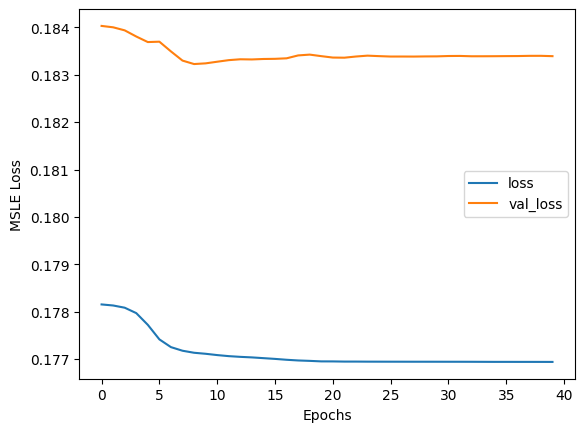

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()


In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy())
   + np.std(reconstruction_errors.numpy())
  return threshold


In [ ]:
def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds


In [ ]:
threshold = find_threshold(model, xtrain)
print(f"Threshold: {threshold}")


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold: 0.18237486151893992


In [ ]:
predictions = get_predictions(model, xtest, threshold)
accuracy_score(predictions, ytest)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.78

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'predictions' and 'y_test' are already defined from your previous code
predictions = get_predictions(model, xtest, threshold)

# Convert predictions to integers (0 for anomaly, 1 for normal)
predictions = predictions.astype(int)

# Generate classification report
report = classification_report(ytest, predictions)
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75       400
         1.0       0.88      0.74      0.80       600

    accuracy                           0.78      1000
   macro avg       0.78      0.79      0.78      1000
weighted avg       0.80      0.78      0.78      1000

